# Navigation project report

In [1]:
!python -m pip install unityagents
!python -m pip install torch
!python -m pip install numpy
!python -m pip install matplotlib
!python -m pip install 'prompt-toolkit==1.0.15'

  Using cached https://files.pythonhosted.org/packages/d1/e6/adb3be5576f5d27c6faa33f1e9fea8fe5dbd9351db12148de948507e352c/prompt_toolkit-2.0.7-py3-none-any.whl
ipython 5.0.0 has requirement prompt-toolkit<2.0.0,>=1.0.3, but you'll have prompt-toolkit 2.0.7 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.15
    Uninstalling prompt-toolkit-1.0.15:
      Successfully uninstalled prompt-toolkit-1.0.15
  Using cached https://files.pythonhosted.org/packages/04/d1/c6616dd03701e7e2073f06d5c3b41b012256e42b72561f16a7bd86dd7b43/prompt_toolkit-1.0.15-py3-none-any.whl
jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.15 which is incompatible.
  Found existing installation: prompt-toolkit 2.0.7
    Uninstalling prompt-toolkit-2.0.7:
      Successfully uninstalled prompt-toolkit-2.0.7


In [2]:
from unityagents import UnityEnvironment
import numpy as np

# import model
from agent import Agent, DQN, DoubleDQN
import torch
from deep_monkey import *

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import os

# Setup environment
UnityEnvironment contains several brains which control the actions of the agents. In this case we are interested only in the first brain as there is only one agent 

In [3]:
env = UnityEnvironment(file_name="../bin/Banana_Linux/Banana.x86_64")

# Extract brain object and its name,
# useful for obtaining feedback from the environment
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Training a vanilla DQN agent
The model we are going to train is a vanilla DQN model. The following hyperparameters were chosen for the algorithm:
```
- gamma           = 0.99
- tau             = 1e-3
- learning_rate   = 1e-3
- learning_period = 4
- epsilon_max     = 1
- epsilon_min     = 0.01
```
The two neural networks used to estimate the q function have the following hyperparameters:
- 2 fully connected layers
- 64 units per layer


In [4]:
# reset the environment
state = env.reset(train_mode=True)
observation = state[brain_name].vector_observations[0]

# create the agent
agent = DQN(state_size = len(observation), 
            action_size = brain.vector_action_space_size,
            seed = 0)

# train the agent
agent, episodes_n, avg_score, scores = train_agent(agent,env,stop_avg_score=13)


Episode 100	Average Score: 1.31
Episode 200	Average Score: 5.22
Episode 300	Average Score: 9.27
Episode 400	Average Score: 10.00
Episode 500	Average Score: 11.98
Episode 575	Average Score: 13.01
Environment solved in 475 episodes!	Average Score: 13.01


Save agent checkpoint, plot the evolution of the average score during training and save the graph to file.

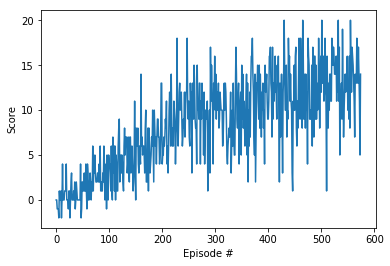

In [5]:
tag = generate_filename_tag(agent, episodes_n, avg_score)
checkpoint_filename = save_checkpoint(agent, tag)
fig = plot_score(scores)
fig.savefig("plots/training_plot_" + tag + ".pdf")


## Trained vanilla DQN demo

In [6]:
# reset the environment
state = env.reset(train_mode=False)
observation = state[brain_name].vector_observations[0]

# load the weights from file
agent = Agent(state_size = len(observation), 
              action_size = brain.vector_action_space_size,
              seed = 0,
              checkpoint_filename=checkpoint_filename)

_ = demo_agent(agent, env)

Score: 4.0


## Training a DoubleDQN agent
In this section we will repeat the same sequence but we will train a DoubleDQN agent, save its weights and generate a score plot with training values.

Episode 100	Average Score: 0.91
Episode 200	Average Score: 4.65
Episode 300	Average Score: 8.59
Episode 400	Average Score: 10.44
Episode 489	Average Score: 13.02
Environment solved in 389 episodes!	Average Score: 13.02


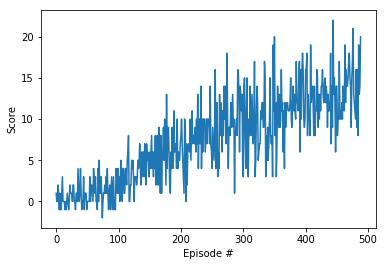

In [7]:
# reset the environment
state = env.reset(train_mode=True)
observation = state[brain_name].vector_observations[0]

# create the agent
agent = DoubleDQN(state_size = len(observation), 
            action_size = brain.vector_action_space_size,
            seed = 0)

# train the agent
agent, episodes_n, avg_score, scores = train_agent(agent,env,stop_avg_score=13)

# save checkpoint, plot scores and save plot
tag = generate_filename_tag(agent, episodes_n, avg_score)
checkpoint_filename = save_checkpoint(agent, tag)
fig = plot_score(scores)
fig.savefig("plots/training_plot_" + tag + ".pdf")

## Trained DoubleDQN demo

In [8]:
# reset the environment
state = env.reset(train_mode=False)
observation = state[brain_name].vector_observations[0]

# load the weights from file
agent = Agent(state_size = len(observation), 
              action_size = brain.vector_action_space_size,
              seed = 0,
              checkpoint_filename=checkpoint_filename)

_ = demo_agent(agent, env)

Score: 17.0


In [ ]:
env.close()

In [ ]:
### Future development
Agent's learning performances (number of episodes to solve the task) should be improved implementing the following:
- Prioritized experience replay
- Dueling DQN

In addition, the same task should be solved starting from raw pixel observations.